<a href="https://colab.research.google.com/github/Denisebps/Boston311/blob/main/Boston311_departments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Departments analysis
So these are the questions I'll search for an answer to:
*  Which government departments are taking most of the complaints/requests?
*  Which government departments are responding and resolving the complaints in the given time?

These are key questions because managers and citizens must know which departments are the most and least efficient. Also, this information can help budget and personal allocation.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

Creating the data frame *df* with all the data. For more details on the code check [here](https://github.com/Denisebps/Boston311/blob/main/Boston311_cleaning.ipynb)

In [2]:
links=["https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/94b499d9-712a-4d2a-b790-7ceec5c9c4b1/download/311_service_requests_2011.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/382e10d9-1864-40ba-bef6-4eea3c75463c/download/311_service_requests_2012.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/407c5cd0-f764-4a41-adf8-054ff535049e/download/311_service_requests_2013.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/bdae89c8-d4ce-40e9-a6e1-a5203953a2e0/download/311_service_requests_2014.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/c9509ab4-6f6d-4b97-979a-0cf2a10c922b/download/311_service_requests_2015.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/b7ea6b1b-3ca4-4c5b-9713-6dc1db52379a/download/311_service_requests_2016.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/30022137-709d-465e-baae-ca155b51927d/download/311_service_requests_2017.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/2be28d90-3a90-4af1-a3f6-f28c1e25880a/download/311_service_requests_2018.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/ea2e4696-4a2d-429c-9807-d02eb92e0222/download/311_service_requests_2019.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/script_105774672_20210108153400_combine.csv",
       "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/f53ebccd-bc61-49f9-83db-625f209c95f5/download/tmp8aj__jit.csv"]

df=pd.DataFrame()
for link in links:
  df=df.append(pd.read_csv(link))

df["closed_minus_target"]=pd.to_datetime(df["closed_dt"])-pd.to_datetime(df["target_dt"])
df["elapsed_time"]=pd.to_datetime(df["closed_dt"])-pd.to_datetime(df["open_dt"])
df["elapsed_days"]=df["elapsed_time"].dt.days

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The subject column brings the departments' names. Let's see how many departments there are and their names:

In [3]:
#names of the departments
df["subject"].unique()

array(['Public Works Department', 'Transportation - Traffic Division',
       "Mayor's 24 Hour Hotline", 'Inspectional Services',
       'Property Management', 'Parks & Recreation Department',
       'Boston Water & Sewer Commission', 'Animal Control',
       'Neighborhood Services', 'Boston Police Department',
       'Disability Department', 'Consumer Affairs & Licensing',
       'Veterans', 'CRM Application'], dtype=object)

In [4]:
#number of departments
df["subject"].unique().shape

(14,)

There are 14 departments in our dataset.

Next, let's plot the number of requests per department.

And check the totals in the table.

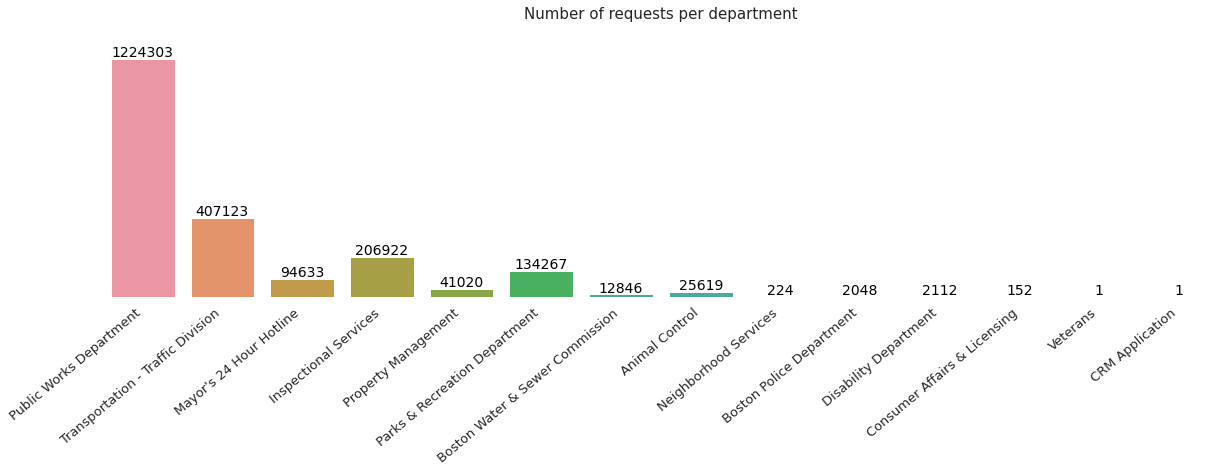

In [5]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style(style="white")

ax = sns.countplot(x="subject", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Number of requests per department", fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 1400000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+150000), ha='center', va='top', color='black', size=14)



In [6]:
df["subject"].value_counts()#.to_frame()

Public Works Department              1224303
Transportation - Traffic Division     407123
Inspectional Services                 206922
Parks & Recreation Department         134267
Mayor's 24 Hour Hotline                94633
Property Management                    41020
Animal Control                         25619
Boston Water & Sewer Commission        12846
Disability Department                   2112
Boston Police Department                2048
Neighborhood Services                    224
Consumer Affairs & Licensing             152
CRM Application                            1
Veterans                                   1
Name: subject, dtype: int64

**Public Works Department** is the department with the most requests, more than the double **Transportation - Traffic Division** in second. The number of requests greatly varies from department to department.

Let's take a look at the reasons for the requests for these two departments.



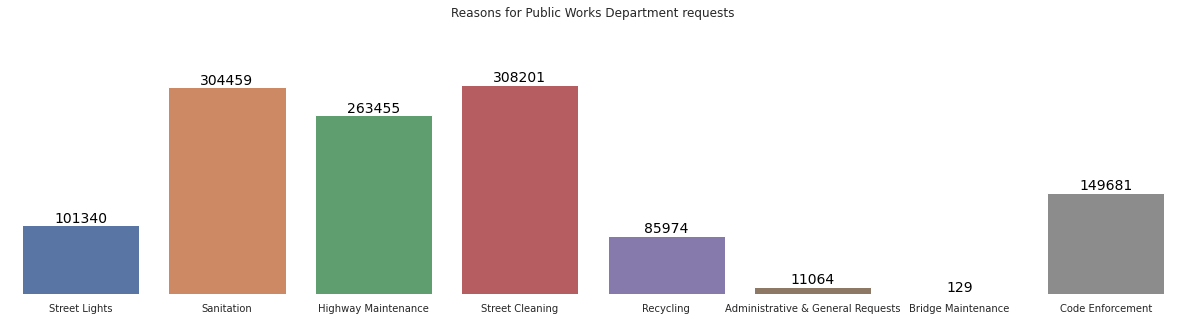

In [7]:
sns.set(rc={'figure.figsize':(21,5)})
sns.set_style(style="white")

ax = sns.countplot(x="reason", data=df[df["subject"]=="Public Works Department"])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, ha="center")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Reasons for Public Works Department requests")
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 400000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+45000), ha='center', va='top', color='black', size=14)

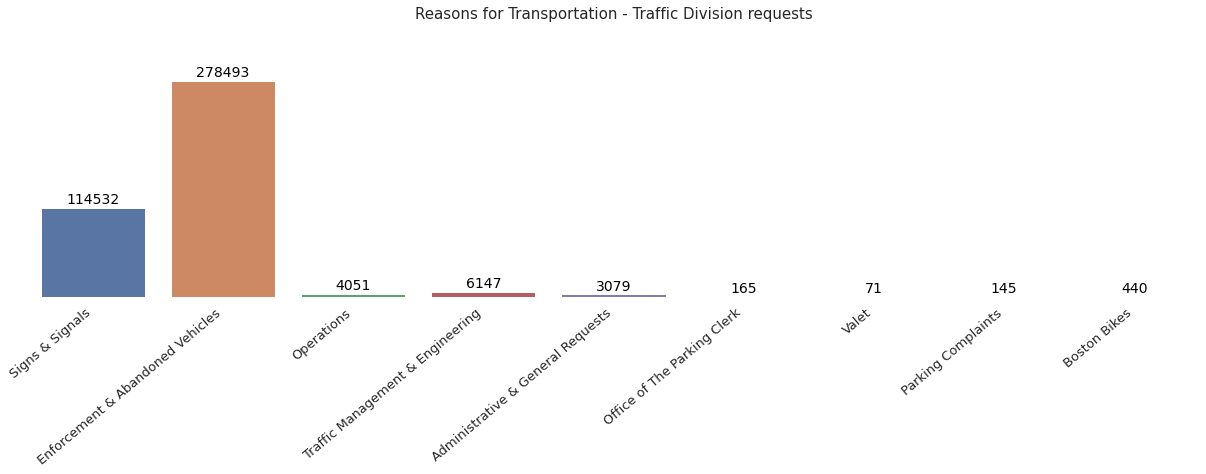

In [8]:
sns.set(rc={'figure.figsize':(21,5)})
sns.set_style(style="white")

ax = sns.countplot(x="reason", data=df[df["subject"]=="Transportation - Traffic Division"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Reasons for Transportation - Traffic Division requests", fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 350000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+40000), ha='center', va='top', color='black', size=14)

In **Public Works Department** the reasons are more distributed. But *Sanitation*, *Highway maintenance*, and *Street cleaning* are the most common.

For **Transportation - Traffic Division** there is a clear predominance of *Enforced and abandoned vehicles* and *Signs and signals*.

Next, let's look at which departments are most on time or overdue and which have the most opened or closed requests.

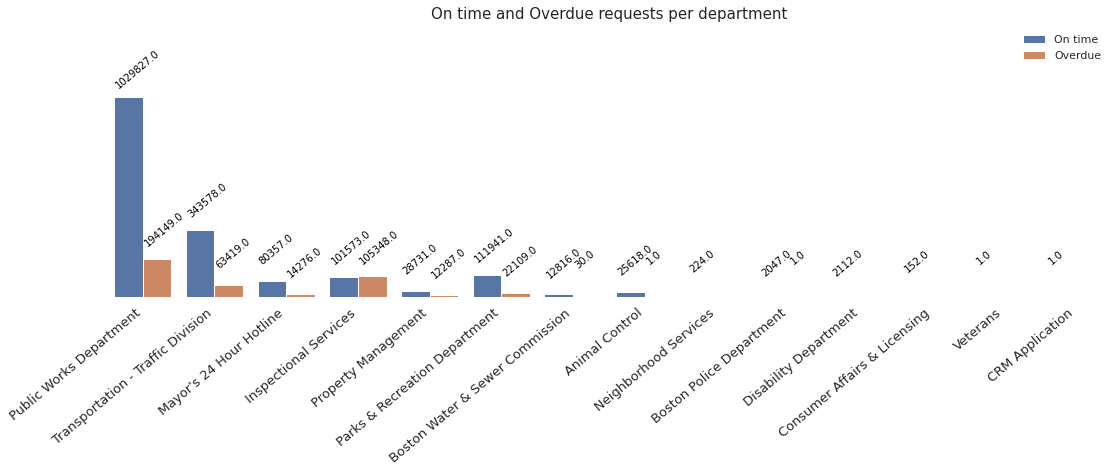

In [9]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style(style="white")

ax = sns.countplot(x="subject", data=df, hue="ontime")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
plt.legend(loc='upper right',frameon=False, labels=["On time","Overdue"])

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("On time and Overdue requests per department", fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 1400000))


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x(), p.get_height()+250000), ha="left", va='top', color='black', size=10, rotation=40)


In [10]:
dep_ontime = pd.crosstab(df["subject"],df["ontime"])
dep_ontime["overdue/ontime"]=dep_ontime.OVERDUE/dep_ontime.ONTIME
dep_ontime.sort_values(by="overdue/ontime")

ontime,ONTIME,OVERDUE,overdue/ontime
subject,,,
CRM Application,1,0,0.000000
Consumer Affairs & Licensing,152,0,0.000000
Disability Department,2112,0,0.000000
Neighborhood Services,224,0,0.000000
Veterans,1,0,0.000000
Animal Control,25618,1,0.000039
Boston Police Department,2047,1,0.000489
Boston Water & Sewer Commission,12816,30,0.002341
Mayor's 24 Hour Hotline,80357,14276,0.177657


For most departments, *overdue* requests are minimal.

Only **Inspectional Services** has more *overdue* than *on time* requests. **Property Management** *overdue/on time* ratio is larger than 0.4, which is a little above the others. Below let's break **Inspectional Services** per reason:





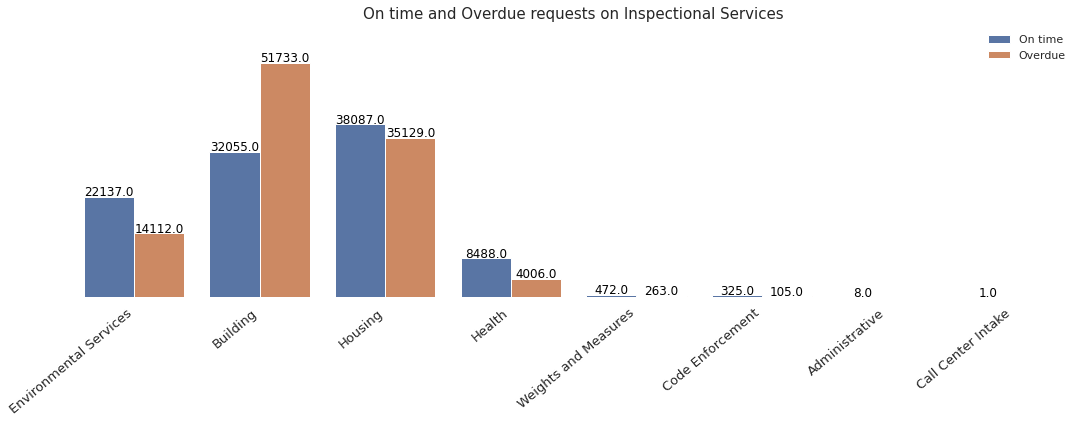

In [11]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style(style="white")

ax = sns.countplot(x="reason", data=df[df["subject"]=="Inspectional Services"], hue="ontime")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=13)
plt.legend(loc='upper right',frameon=False, labels=["On time","Overdue"])

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("On time and Overdue requests on Inspectional Services",fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 60000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+5600), ha="center", va='top', color='black', size=12)

Looks like *Building* is the reason with most overdue requests. Let's try to break it even further:

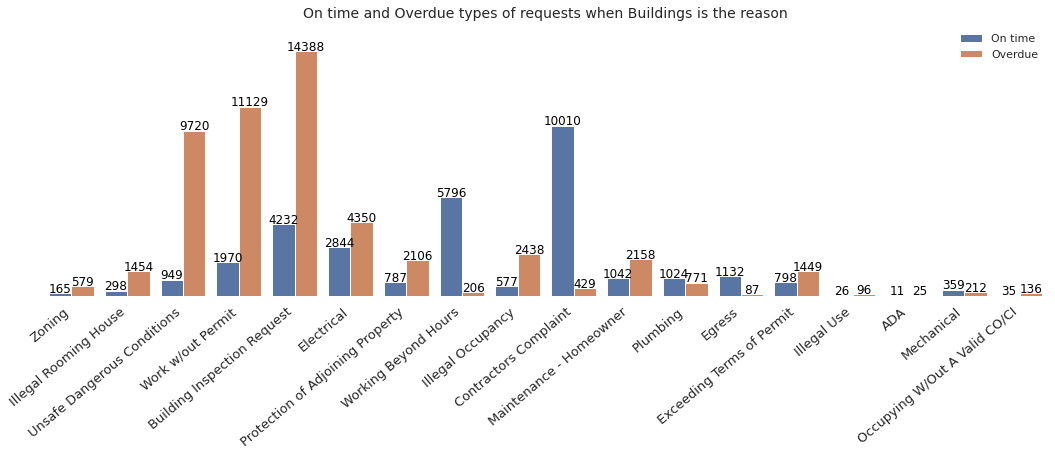

In [12]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style(style="white")

ax = sns.countplot(x="type", data=df[df["reason"]=="Building"][df[df["reason"]=="Building"]["subject"]=="Inspectional Services"], hue="ontime",
                   hue_order = ['ONTIME', 'OVERDUE']) #hue_order to keep the color similar to the other graphs
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=13)
plt.legend(loc='upper right',frameon=False, labels=["On time","Overdue"])


ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("On time and Overdue types of requests when Buildings is the reason",fontsize=14)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0,16000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+1500), ha="center", va='top', color='black', size=12)

Most of the types of requests in *Building* are overdue. Only in 5 of them *on time* predominates.

Since **Property Management** also has a slit larger ratio, let's take a look at its reasons as well.

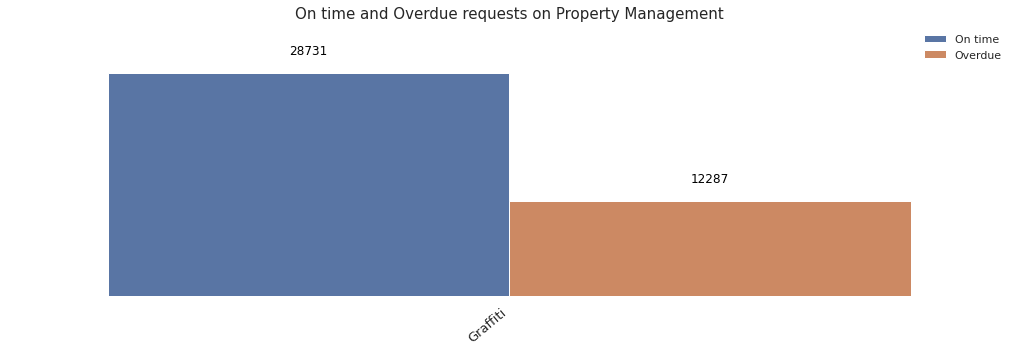

In [13]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style(style="white")

ax = sns.countplot(x="reason", data=df[df["subject"]=="Property Management"], hue="ontime", hue_order = ['ONTIME', 'OVERDUE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=13)
plt.legend(loc='upper right',frameon=False, labels=["On time","Overdue"])

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("On time and Overdue requests on Property Management",fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set(yticklabels=[])
ax.set(ylim=(0, 35000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()+5600), ha="center", va='top', color='black', size=12)

It looks like the only reason for requests for Property Management is Graffiti removal.

Next, we'll see the number of requests *open* or *closed* per department:

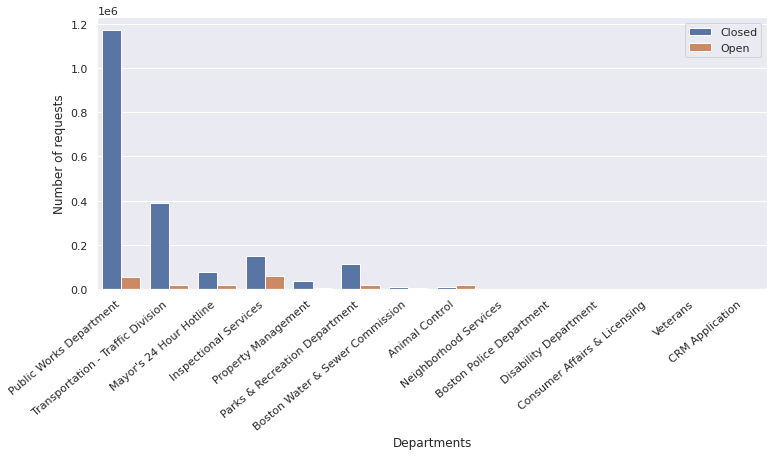

In [14]:
sns.set(rc={'figure.figsize':(12,5)})

ax = sns.countplot(x="subject", data=df, hue="case_status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Departments")
ax.set_ylabel("Number of requests")
plt.legend(loc='upper right')

In [15]:
dep_status = pd.crosstab(df["subject"],df["case_status"])
dep_status["open/closed"]=dep_status.Open/dep_status.Closed
dep_status.sort_values(by="open/closed")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


case_status,Closed,Open,open/closed
subject,,,
CRM Application,1,0,0.000000
Disability Department,2112,0,0.000000
Veterans,1,0,0.000000
Public Works Department,1170466,53837,0.045996
Transportation - Traffic Division,387837,19286,0.049727
Parks & Recreation Department,115169,19098,0.165826
Property Management,34635,6385,0.184351
Mayor's 24 Hour Hotline,75353,19280,0.255862
Inspectional Services,149652,57270,0.382688


**Public Works Department** and **Inspectional Services** have the most open requests. However, the largest opened/closed ratio is from **Consumer Affairs & Licensing** and **Boston Police Department**.  However, as seen previously, they don't have a lot of overdue requests.

Since **Inspectional Services** have the most overdue requests, let's break theirs open and closed requests per reason.

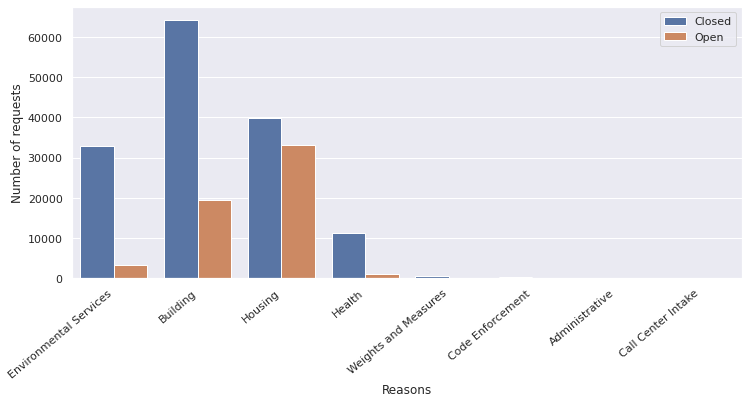

In [16]:
sns.set(rc={'figure.figsize':(12,5)})

ax = sns.countplot(x="reason", data=df[df["subject"]=="Inspectional Services"], hue="case_status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Reasons")
ax.set_ylabel("Number of requests")
plt.legend(loc='upper right')

Despite the number of overdues, most of the cases are closed.

Below are the number of requests per department and the reason.

In [17]:
pd.crosstab(df["reason"],df["subject"]).unstack()[pd.crosstab(df["reason"],df["subject"]).unstack()!=0]#.to_frame()

subject                            reason                           
Animal Control                     Animal Issues                         25619
Boston Police Department           Noise Disturbance                      2048
Boston Water & Sewer Commission    Administrative & General Requests      2275
                                   Billing                                  86
                                   Catchbasin                             4826
                                   Fire Hydrant                           1966
                                   Pothole                                 420
                                   Sidewalk Cover / Manhole               2981
                                   Water Issues                            292
CRM Application                    Test Cases                                1
Consumer Affairs & Licensing       Consumer Affairs Issues                 152
Disability Department              Disability                 

There are some *reasons* that are assigned for more than one subject. But mostly the reasons seem to be very specific. Some are way more common than others.

### Making some analysis on the time taken to close the request and the difference between this and the targeted time.


In [18]:
df[["elapsed_time","closed_minus_target"]].describe()

,elapsed_time,closed_minus_target
count,1952421,1625289
mean,18 days 10:47:24.226071845,-20 days +20:08:57.942635220
std,80 days 13:07:20.964028480,238 days 05:49:17.677279580
min,-1 days +23:59:02,-17959 days +02:42:32
25%,0 days 01:21:58,-5 days +15:36:41
50%,0 days 18:03:53,-2 days +10:31:12
75%,5 days 12:16:30,-1 days +03:46:26
max,2912 days 06:17:38,2898 days 06:17:38


From the table above it's possible to note that most of the requests are closed in less than five days, and are also closed before the targeted date. But some very high values mess with the mean.

We can see that there are some negative *timedeltas* in the elapsed time. This is indicative of a problem in the dataset, where some closed dates are before the open dates. Maybe it is an error during the update of the dataset?

Let's check the upper quantiles:


In [19]:
df["elapsed_time"].dt.days.quantile([0.9, 0.95, 0.97 ,0.99, 0.995, 0.999])

0.900      26.0
0.950      84.0
0.970     156.0
0.990     371.0
0.995     549.0
0.999    1027.0
Name: elapsed_time, dtype: float64

In [20]:
df["closed_minus_target"].dt.days.quantile([0.9, 0.95, 0.97 ,0.99, 0.995, 0.999])

0.900      6.000
0.950     35.000
0.970     77.000
0.990    263.000
0.995    436.000
0.999    899.712
Name: closed_minus_target, dtype: float64

Indeed there are some outliers.

Below there are boxplots per department, due to the high number of outliers I decided to make some cuts on 130 and 40 days.

[Text(0, 0, 'Public Works Department'),
 Text(0, 0, 'Transportation - Traffic Division'),
 Text(0, 0, "Mayor's 24 Hour Hotline"),
 Text(0, 0, 'Inspectional Services'),
 Text(0, 0, 'Property Management'),
 Text(0, 0, 'Parks & Recreation Department'),
 Text(0, 0, 'Boston Water & Sewer Commission'),
 Text(0, 0, 'Animal Control'),
 Text(0, 0, 'Neighborhood Services'),
 Text(0, 0, 'Boston Police Department'),
 Text(0, 0, 'Disability Department'),
 Text(0, 0, 'Consumer Affairs & Licensing'),
 Text(0, 0, 'Veterans'),
 Text(0, 0, 'CRM Application')]

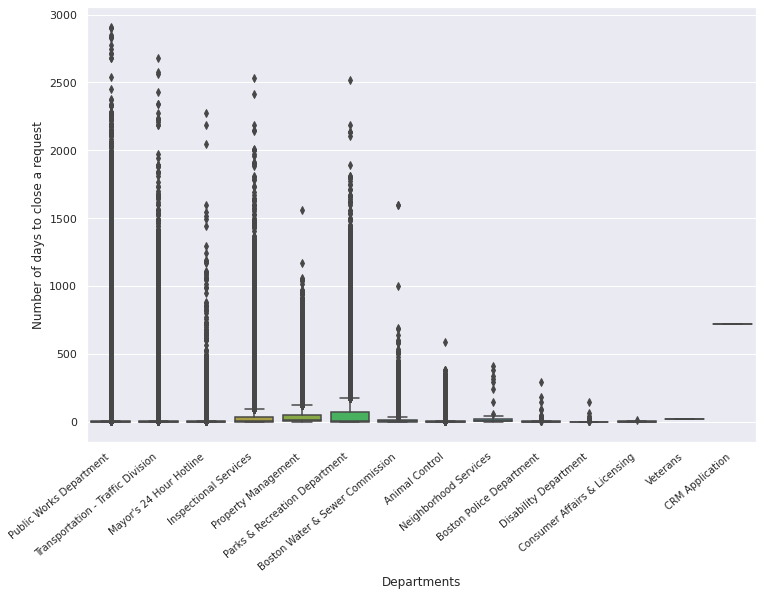

In [21]:
sns.set(rc={'figure.figsize':(12,8)})

ax=sns.boxplot(data=df, x="subject", y=df["elapsed_days"])
ax.set_xlabel("Departments")
ax.set_ylabel("Number of days to close a request")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=40, ha="right")

[Text(0, 0, 'Public Works Department'),
 Text(0, 0, 'Transportation - Traffic Division'),
 Text(0, 0, "Mayor's 24 Hour Hotline"),
 Text(0, 0, 'Inspectional Services'),
 Text(0, 0, 'Parks & Recreation Department'),
 Text(0, 0, 'Property Management'),
 Text(0, 0, 'Boston Water & Sewer Commission'),
 Text(0, 0, 'Animal Control'),
 Text(0, 0, 'Boston Police Department'),
 Text(0, 0, 'Disability Department'),
 Text(0, 0, 'Consumer Affairs & Licensing'),
 Text(0, 0, 'Veterans'),
 Text(0, 0, 'Neighborhood Services')]

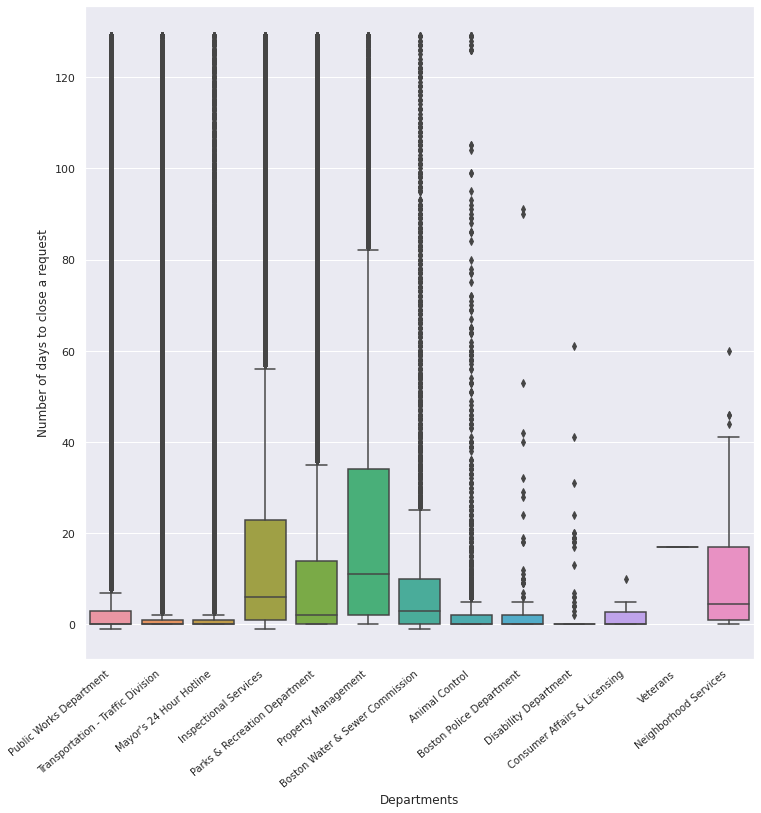

In [22]:
df_less_than_130=df[df["elapsed_time"].dt.days<130]
sns.set(rc={'figure.figsize':(12,12)})
ax=sns.boxplot(data=df_less_than_130, x="subject", y=df_less_than_130["elapsed_days"])
ax.set_xlabel("Departments")
ax.set_ylabel("Number of days to close a request")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10,rotation=40, ha="right")

[Text(0, 0, 'Public Works Department'),
 Text(0, 0, 'Transportation - Traffic Division'),
 Text(0, 0, "Mayor's 24 Hour Hotline"),
 Text(0, 0, 'Inspectional Services'),
 Text(0, 0, 'Parks & Recreation Department'),
 Text(0, 0, 'Property Management'),
 Text(0, 0, 'Boston Water & Sewer Commission'),
 Text(0, 0, 'Animal Control'),
 Text(0, 0, 'Boston Police Department'),
 Text(0, 0, 'Disability Department'),
 Text(0, 0, 'Consumer Affairs & Licensing'),
 Text(0, 0, 'Veterans'),
 Text(0, 0, 'Neighborhood Services')]

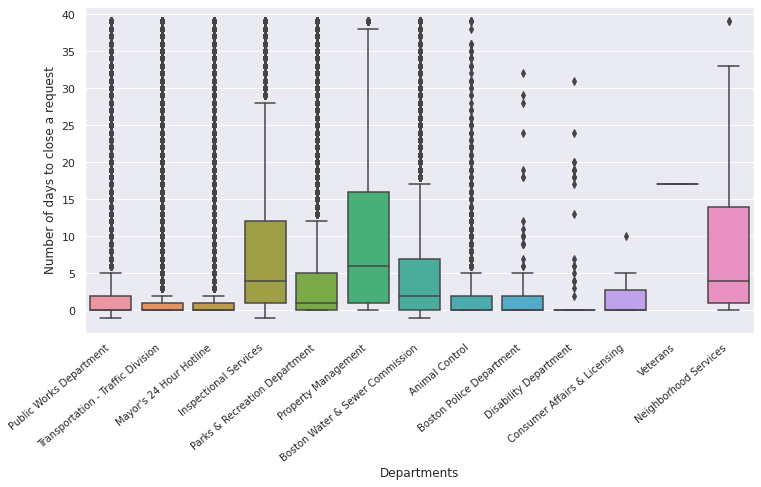

In [23]:
df_less_than_40=df[df["elapsed_time"].dt.days<40]
sns.set(rc={'figure.figsize':(12,6)})
ax=sns.boxplot(data=df_less_than_40, x="subject", y=df_less_than_40["elapsed_days"])
ax.set_xlabel("Departments")
ax.set_ylabel("Number of days to close a request")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10,rotation=40, ha="right")

**Inspectional Services**, **Neighborhood Services**, and **Property Management** are the departments that take longer to close a request.

But all of them have outliers. **Public Works Department** and **Transportation - Traffic Division** have a slower response time, despite being the ones with the most requests.

Bellow, there is the description table per department:

In [24]:
df.groupby('subject').describe().loc[:,"elapsed_time"]

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Animal Control,8593,16 days 00:09:58.216804375,54 days 05:55:52.345585544,0 days 00:00:05,0 days 01:35:22,0 days 19:58:38,2 days 19:16:15,587 days 03:59:22
Boston Police Department,235,6 days 05:32:43.357446808,26 days 01:04:41.660595254,0 days 00:00:11,0 days 00:02:55,0 days 13:16:28,2 days 23:36:51.500000,293 days 03:45:33
Boston Water & Sewer Commission,8274,31 days 12:49:42.832849895,79 days 22:36:41.948146917,-1 days +23:59:59,0 days 22:56:51.750000,3 days 22:42:29,15 days 23:09:22.750000,1599 days 02:21:28
CRM Application,1,724 days 01:50:31,NaT,724 days 01:50:31,724 days 01:50:31,724 days 01:50:31,724 days 01:50:31,724 days 01:50:31
Consumer Affairs & Licensing,8,2 days 10:30:09.250000,3 days 20:35:06.129690216,0 days 00:02:34,0 days 01:16:01,0 days 10:18:04,3 days 01:39:50.750000,10 days 16:02:49
Disability Department,2112,0 days 06:24:07.113636363,3 days 22:06:32.429309970,0 days 00:00:07,0 days 00:00:42,0 days 00:01:14,0 days 00:02:32.250000,146 days 02:59:41
Inspectional Services,149652,51 days 20:30:11.988914445,128 days 10:32:46.892868490,-1 days +23:59:48,1 days 21:57:16.500000,8 days 04:19:01.500000,37 days 19:37:43.500000,2533 days 01:11:40
Mayor's 24 Hour Hotline,75353,12 days 06:21:01.351253413,51 days 12:49:47.501918117,0 days 00:00:06,0 days 00:38:24,0 days 03:38:49,2 days 03:52:54,2276 days 06:18:20
Neighborhood Services,85,35 days 10:15:18.811764706,85 days 11:48:23.501160863,0 days 00:00:12,2 days 02:05:26,6 days 19:42:06,22 days 12:20:50,410 days 19:26:26


In [25]:
df.groupby('subject').describe().loc[:,"closed_minus_target"]

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Animal Control,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Boston Police Department,1,18 days 01:56:47,NaT,18 days 01:56:47,18 days 01:56:47,18 days 01:56:47,18 days 01:56:47,18 days 01:56:47
Boston Water & Sewer Commission,27,29 days 21:49:16.555555555,35 days 00:49:07.869308676,-1 days +11:39:39,12 days 08:07:42,27 days 19:46:41,28 days 09:33:20.500000,174 days 21:24:22
CRM Application,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Consumer Affairs & Licensing,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Disability Department,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Inspectional Services,149643,-46 days +11:36:47.013739380,237 days 23:00:57.728335004,-720 days +00:00:08,-75 days +21:58:22.500000,-4 days +04:00:37,9 days 19:26:55,2415 days 04:57:44
Mayor's 24 Hour Hotline,13983,-2 days +18:04:28.747264536,61 days 20:18:48.642173740,-35 days +02:01:38,-14 days +00:02:32.500000,-14 days +16:43:53,-9 days +01:17:13,2034 days 19:36:33
Neighborhood Services,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT


Some departments take longer to close a request, but that's expected since there are very different types of requests in each one.

**Boston Water & Sewer Commission** is the only department with most of the requests closed after the targeted date.

By looking at the max column of both tables: Outliers, outliers, everywhere!

Let's take a look at the histogram:

(array([1.828523e+06, 4.736400e+04, 2.318900e+04, 1.415400e+04,
        1.016700e+04, 7.327000e+03, 5.175000e+03, 3.479000e+03,
        2.428000e+03, 1.757000e+03, 1.579000e+03, 1.179000e+03,
        1.005000e+03, 9.390000e+02, 7.850000e+02, 6.440000e+02,
        5.390000e+02, 3.190000e+02, 3.480000e+02, 2.970000e+02,
        2.170000e+02, 1.610000e+02, 1.350000e+02, 9.700000e+01,
        1.100000e+02, 7.100000e+01, 5.900000e+01, 5.100000e+01,
        4.000000e+01, 4.100000e+01, 4.200000e+01, 2.700000e+01,
        4.000000e+01, 2.400000e+01, 1.400000e+01, 1.000000e+01,
        1.900000e+01, 1.100000e+01, 1.700000e+01, 8.000000e+00,
        8.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
        2.000000e+00, 0.000000e+00, 5.000000e+00, 2.000000e+00,
        4.000000e+00, 3.000000e+00]),
 array([-1.00000e+00,  5.72600e+01,  1.15520e+02,  1.73780e+02,
         2.32040e+02,  2.90300e+02,  3.48560e+02,  4.06820e+02,
         4.65080e+02,  5.23340e+02,  5.81600e+02,  6.39860e+02,
  

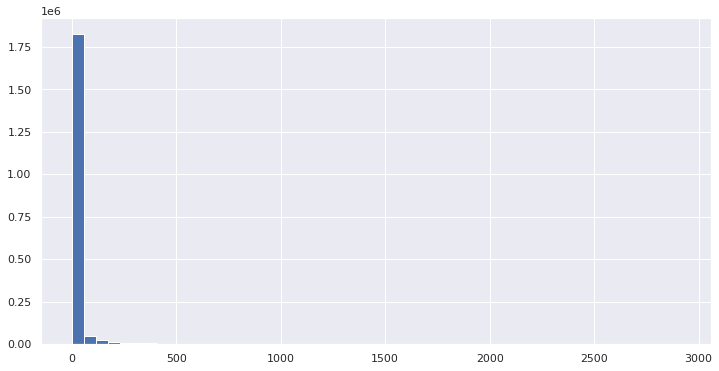

In [26]:
plt.hist(df["elapsed_days"], bins=50)

There are outliers. Lots of them.

Finally, let's take a look at the average number of days to close a request per department. I decided to remove CRM Application from the graph since it has only one request and took 724 days to close it. And it was making the visualization of the other departments difficult.


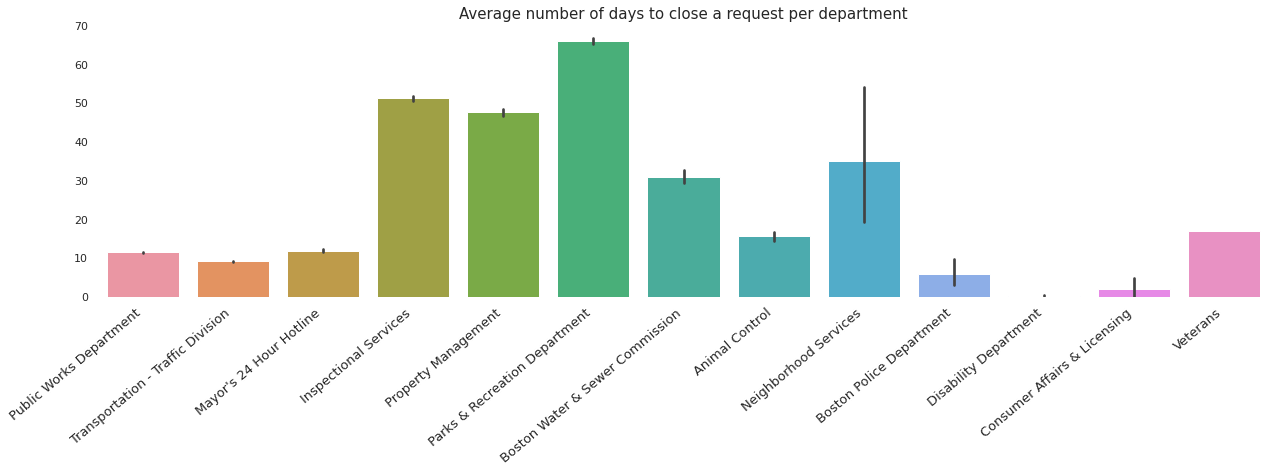

In [27]:
sns.set(rc={'figure.figsize':(21,5)})
sns.set_style(style="white")

ax = sns.barplot(x=df.drop(163050)["subject"],y="elapsed_days" , data=df.drop(163050))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13,ha="right",rotation=40)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Average number of days to close a request per department",fontsize=15)
ax.grid(False)
sns.despine(top=True, right=True, left=True, bottom=True)

**Parks and Recreation Department** has the largest average number of days to close a request. Followed by **Inspectional Services** and **Property Management**. It makes sense that **Inspectional Services** has a large average. For the others, the outliers messed with the mean.

## The never closed requests

I've found out that some simple requests are open for years. So I decided to dig in:

In [28]:
#I found out that there are some simple cases, that are opened for years but are probably solved by now. Why?

df[df["department"]=="Temp"]
#to see the pictures full url:
#https://311.boston.gov/media/boston/report/photos/59de8ed26963892616b4e721/report.jpg
#https://311.boston.gov/media/boston/report/photos/5b0823a17505f17ddcd44930/photo_20180525_105128.jpg
#df[df["department"]=="Temp"].iloc[0,13]
#df[df["department"]=="Temp"].iloc[1,13]

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,type,queue,department,submittedphoto,closedphoto,location,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,closed_minus_target,elapsed_time,elapsed_days
203124,101002239038,2017-10-11 17:36:00,2017-10-13 08:30:00,NaN,OVERDUE,Open,,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,Temporary Events,Temp,https://311.boston.gov/media/boston/report/pho...,NaN,3 Union Park St Roxbury MA 02118,4,1C,2,D4,Roxbury,4,03,0307,3 Union Park St,2118.0,42.3420,-71.0706,Citizens Connect App,NaT,NaT,NaN
110956,101002488135,2018-05-25 10:54:00,2018-05-26 10:54:34,NaN,OVERDUE,Open,,Traffic Signal Inspection,Transportation - Traffic Division,Signs & Signals,Traffic Signal Inspection,Temporary Events,Temp,https://311.boston.gov/media/boston/report/pho...,NaN,INTERSECTION of N Harvard St & Western Ave Al...,11,04,8,D14,Allston / Brighton,15,22,2201,INTERSECTION N Harvard St & Western Ave,NaN,42.3594,-71.0587,Citizens Connect App,NaT,NaT,NaN


Creating a dataset with all opened and overdue requests from the original data. And plotting a histogram with their open dates.

In [29]:
df_nonclosed =df[df["closed_dt"].isnull()][df[df["closed_dt"].isnull()]["ontime"]=="OVERDUE"]
df_nonclosed.tail()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,type,queue,department,submittedphoto,closedphoto,location,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,closed_minus_target,elapsed_time,elapsed_days
232102,101004023935,2021-10-26 11:20:00,2021-10-27 11:20:31,NaN,OVERDUE,Open,,Unsafe/Dangerous Conditions,Inspectional Services,Building,Unsafe Dangerous Conditions,ISD_Building (INTERNAL),ISD,NaN,NaN,118 Bayswater St East Boston MA 02128,1,09,1,A7,East Boston,1,Ward 1,0112,118 Bayswater St,2128.0,42.3837,-71.0019,Constituent Call,NaT,NaT,NaN
232104,101004023948,2021-10-26 11:26:07,2021-10-27 11:26:07,NaN,OVERDUE,Open,,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 07: South Dorchester,PWDx,https://311.boston.gov/media/boston/report/pho...,NaN,15 Ferndale St Dorchester MA 02124,8,07,4,B3,Dorchester,9,Ward 17,1705,15 Ferndale St,2124.0,42.2888,-71.0771,Citizens Connect App,NaT,NaT,NaN
232121,101004024214,2021-10-26 13:50:01,2021-10-27 13:50:01,NaN,OVERDUE,Open,,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 03: North Dorchester,PWDx,NaN,NaN,INTERSECTION of Folsom St & Woodward Park St ...,7,03,9,B2,Roxbury,13,13,1302,INTERSECTION Folsom St & Woodward Park St,NaN,42.3594,-71.0587,Citizens Connect App,NaT,NaT,NaN
232125,101004024230,2021-10-26 13:57:00,2021-10-27 13:57:20,NaN,OVERDUE,Open,,Unsafe/Dangerous Conditions,Inspectional Services,Building,Unsafe Dangerous Conditions,ISD_Building (INTERNAL),ISD,NaN,NaN,11 Fenwick Pl Roxbury MA 02119,9,10B,7,B2,Roxbury,13,Ward 9,0905,11 Fenwick Pl,2119.0,42.3250,-71.0873,Constituent Call,NaT,NaT,NaN
232130,101004024257,2021-10-26 14:22:45,2021-10-27 14:22:45,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),PWDx_District 03: North Dorchester,PWDx,NaN,NaN,3 Magnolia Pl Dorchester MA 02125,7,03,7,B2,Roxbury,13,Ward 13,1304,3 Magnolia Pl,2125.0,42.3133,-71.0731,Citizens Connect App,NaT,NaT,NaN


In [30]:
#transforming open_dt to datetime
df_nonclosed["open_dt"]=pd.to_datetime(df_nonclosed["open_dt"])
df_nonclosed["open_dt"]

22       2011-07-01 07:57:58
242      2011-07-01 11:12:11
295      2011-07-01 13:25:46
334      2011-07-01 15:15:38
356      2011-07-01 17:43:28
                 ...        
232102   2021-10-26 11:20:00
232104   2021-10-26 11:26:07
232121   2021-10-26 13:50:01
232125   2021-10-26 13:57:00
232130   2021-10-26 14:22:45
Name: open_dt, Length: 141743, dtype: datetime64[ns]

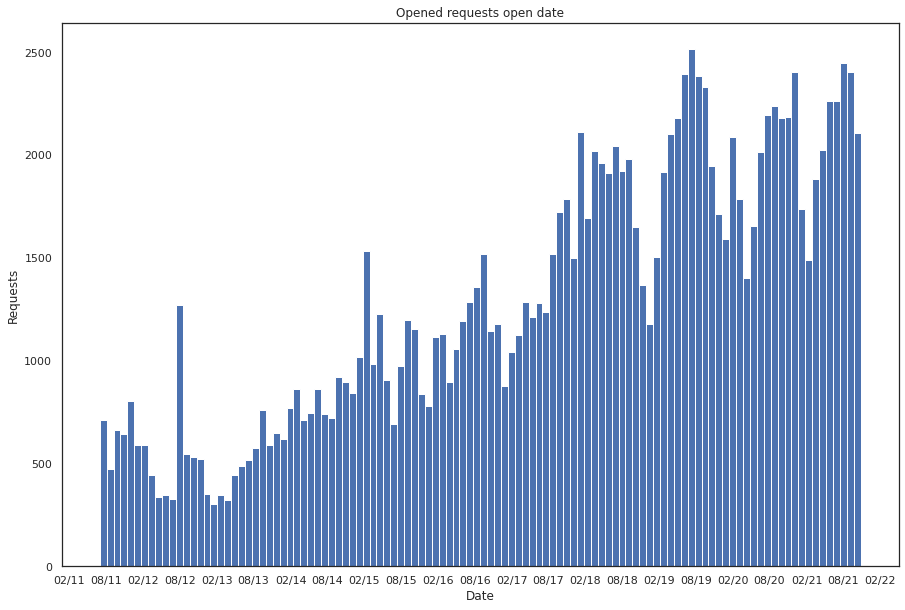

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df_nonclosed["open_dt"], bins=110)

ax.set(xlabel="Date",
       ylabel="Requests",
       title="Opened requests open date")

date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))



What happened around August 2012, February 2015, August 2016?
Is this a problem in their dataset? Did someone forget to close them?

That is not my focus right now, but could it also explain some overdue requests? Are they overdue because they were never closed or were closed in the dataset after they were resolved?

##Conclusions

* **Public Works Department** and **Transportation - Traffic Division** are the departments with the most requests. However, they seem to handle them well, since their overdue/on time ratio is very low.
* **Inspectional Services** on the other hand have a lot of overdue requests, most of them are related to *Building* as a reason. I would say that this department deserves some attention, as to why there are so many delays. Does it need more personal, budget?
* The dataset is full of outliers, but most departments close their requests in under 40 days.
* There seem to be a problem with the dataset regarding some closed dates before open dates
* There are some never closed requests, and they need to be addressed in the future.